### a)

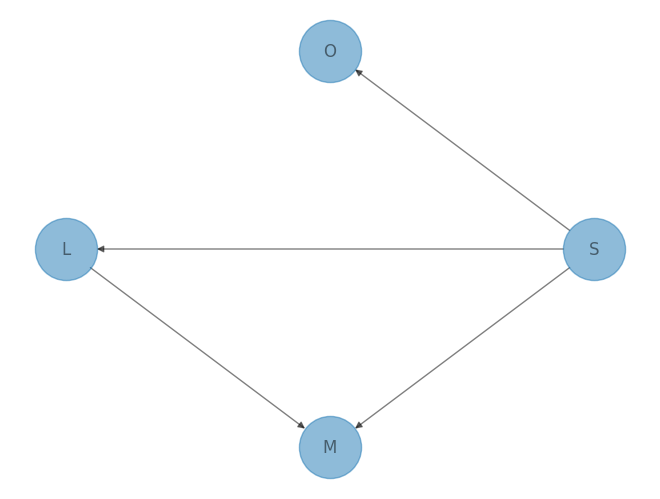

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

# Definim structura
model = BayesianNetwork([("S", "O"), ("S", "L"), ("S","M"), ("L", "M")])
pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [2]:
CPD_S = TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])
print(CPD_S)

# Definirea variabilelor cu un singur parinte(O si L)
CPD_O = TabularCPD(variable='O', variable_card=2, 
                   values=[[0.1, 0.7],  
                           [0.9, 0.3]], 
                   evidence=['S'],
                   evidence_card=[2])
print(CPD_O)
CPD_L = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.7, 0.2],  
                           [0.3, 0.8]], 
                   evidence=['S'],
                   evidence_card=[2])
print(CPD_L)

# Definirea variabilei cu 2 parinti(M)
CPD_M = TabularCPD(variable='M', variable_card=2,
                   values=[[0.8, 0.4, 0.5, 0.1], 
                           [0.2, 0.6, 0.5, 0.9]],
                   evidence=['S', 'L'],
                   evidence_card=[2, 2])
print(CPD_M)

+------+-----+
| S(0) | 0.6 |
+------+-----+
| S(1) | 0.4 |
+------+-----+
+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| O(0) | 0.1  | 0.7  |
+------+------+------+
| O(1) | 0.9  | 0.3  |
+------+------+------+
+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| L(0) | 0.7  | 0.2  |
+------+------+------+
| L(1) | 0.3  | 0.8  |
+------+------+------+
+------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| L    | L(0) | L(1) | L(0) | L(1) |
+------+------+------+------+------+
| M(0) | 0.8  | 0.4  | 0.5  | 0.1  |
+------+------+------+------+------+
| M(1) | 0.2  | 0.6  | 0.5  | 0.9  |
+------+------+------+------+------+


In [3]:
# Adaugarea distributiilor conditionale la model:
model.add_cpds(CPD_S, CPD_O, CPD_L, CPD_M)
model.get_cpds()

# Verificarea modelului:
model.check_model()

# Verificarea independentelor:
model.local_independencies(['S', 'O', 'L', 'M'])

(O ⟂ M, L | S)
(L ⟂ O | S)
(M ⟂ O | S, L)

### b)

In [4]:
from pgmpy.inference import VariableElimination

# Crearea unui obiect de inferenta
inference = VariableElimination(model)

prob_S_given_OLM1 = inference.query(["S"], evidence={"O": 1, "L": 1, "M": 1})
print(prob_S_given_OLM1)

prob_S_given_OLM2 = inference.query(["S"], evidence={"O": 1, "L": 0, "M": 0})
print(prob_S_given_OLM2)

prob_S_given_OLM3 = inference.query(["S"], evidence={"O": 1, "L": 1, "M": 0})
print(prob_S_given_OLM3)

prob_S_given_OLM4 = inference.query(["S"], evidence={"O": 1, "L": 0, "M": 1})
print(prob_S_given_OLM4)

prob_S_given_OLM5 = inference.query(["S"], evidence={"O": 0, "L": 0, "M": 0})
print(prob_S_given_OLM5)

prob_S_given_OLM6 = inference.query(["S"], evidence={"O": 0, "L": 1, "M": 1})
print(prob_S_given_OLM6)

prob_S_given_OLM7 = inference.query(["S"], evidence={"O": 0, "L": 0, "M": 1})
print(prob_S_given_OLM7)

prob_S_given_OLM8 = inference.query(["S"], evidence={"O": 1, "L": 1, "M": 0})
print(prob_S_given_OLM8)


+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5294 |
+------+----------+
| S(1) |   0.4706 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.9618 |
+------+----------+
| S(1) |   0.0382 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8710 |
+------+----------+
| S(1) |   0.1290 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8630 |
+------+----------+
| S(1) |   0.1370 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5455 |
+------+----------+
| S(1) |   0.4545 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0508 |
+------+----------+
| S(1) |   0.9492 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.2308 |
+------+----------+
| S(1) |   0.7692 |
+------+----------+
+------+----------+
